## Redimensionamento da imagem
***
### O que é interpolação?
***

Redimensionamento é o processo de aumentar ou diminuir o tamanho de uma imagem em termos de largura e altura.

Ao redimensionar uma imagem, é importante ter em mente o “aspect ratio”,que é a proporção da largura da imagem coma altura da imagem. Ignorar o aspect ratio pode levar a imagens redimensionadas que parecem comprimidas e distorcidas.

Em  geral,  você  quer  preservar o aspect  ratio de suas  imagens  ao redimensionar, especialmente se essas imagens forem apresentadas como saída para o usuário. As exceções com  certeza  aplicam-se,  no  entanto, ao  explorar  técnicas  de  aprendizado  de  máquinas, veremos que nossos algoritmos muitas vezes ignoram o aspect ratio de uma imagem.

Também  precisamos considerar o  método  de  interpolação  da  nossa  função  de redimensionamento. A definição formal de interpolação é "o método de construção de novos pontos de dados dentro do intervalo de conjuntos discretos de pontos conhecidos". Nesse caso, os "pontos conhecidos" são os pixels da nossa imagem original. E o objetivo de uma função de interpolação é obter essas regiões de pixels e usá-las para aumentar ou diminuir o tamanho da imagem.

Em  geral,  é  muito  mais  benéfico  (e  visualmente  atraente)  diminuir  o  tamanho  da imagem. Isso ocorre porque a função de interpolação simplesmente tem que remover pixels de uma  imagem.  Por  outro  lado,  se  nós  aumentássemos  o  tamanho  da  imagem,  a  função  de interpolação teria que "preencher as lacunas" entre pixels que anteriormente não existiam.

Normalmente, você estará diminuindo o tamanho de uma imagem em vez de aumentar (as exceções existem, é claro). Ao diminuir o tamanho da imagem, temos menos pixels para processar  (para  não  mencionar  menos  "ruído"  para  lidar),  o  que  leva  a  algoritmos  de processamento de imagem mais rápidos e precisos.

***
### Métodos de Interpolação com OpenCV
***

Ao trabalhar com redimensionamento com OpenCV, usamos apenas o método **cv2.INTER_AREA** para  interpolação. O objetivo  de  uma  função  de  interpolação  é examinar regiões de  pixels  e  usar  essas  regiões para aumentar  ou  diminuir  opticamente  o tamanho da imagem sem introduzir distorções (ou pelo menos tão poucas distorções quanto possível). Vejamos alguns métodos de interpolação com OpenCV.

O  primeiro  método  é  a  interpolação  vizinha  mais  próxima (ou nearest  neighbor interpolation), especificada pelo sinalizador **cv2.INTER_NEAREST**. Este método é a abordagem mais simples para a interpolação. Em vez de calcular médias ponderadas de pixels vizinhos ou aplicar regras complicadas, esse método simplesmente encontra o pixel vizinho mais próximo e assume  o  valor  de  intensidade.  Embora  este  método  seja  rápido  e  simples,  a  qualidade  da imagem redimensionada tende a ser bastante pobre.

Em segundo lugar, temos o método **cv2.INTER_LINEAR** com interpolação bilinear. Este é o método que o OpenCV usa por padrão ao redimensionar imagens. A ideia geral por trás da interpolação  bilinear  pode  ser  encontrada  em  qualquer  livro  de  matemática do  ensino fundamental, na forma: $y = mx + b$.

Obviamente, estamos generalizando um  pouco,  mas  o ponto  chave é  que  estamos fazendo mais do que simplesmente encontrar o pixel "mais próximo" e assumindo o valor dele (como na interpolação vizinha mais próxima), agora estamos obtendo pixels vizinhos e usando essa vizinhança para realmente calcular o valor interpolado (em vez de apenas assumir o valor de pixel mais próximo).

Em  terceiro  lugar,  temos  o  método  de  interpolação **cv2.INTER_AREA**. Há pouca documentação sobre esse método, mas ele é muito parecido com a "interpolação do vizinho mais próximo".

Finalmente, temos **cv2.INTER_CUBIC** e **cv2.INTER_LANCZOS4**. Esses métodos são mais lentos (uma vez que eles não usam mais interpolação linear simples e, em vez disso, usam splines)  e  utilizam  interpolação  bicúbica  em regiões de  pixels  quadrados.  O  método cv2.INTER_CUBIC  opera  em  um  vizinho  de  4x4  pixels  e  cv2.INTER_LANCZOS4  em  uma vizinhança de 8x8 pixels. Em geral, raramente vemoso método cv2.INTER_LANCZOS4 usado na prática.

***
### INTER_AREA
***

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
imagem = cv.imread("./imagens/familia.jpg")
altura, largura = imagem.shape[:2]

In [3]:
def mostrar_imagem(img):
    imagem_colorida = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(imagem_colorida)
    plt.title("Imagem")
    plt.axis("off")
    plt.show()

***

In [4]:
# Se quisermos ajustar a altura é só aplicarmos o mesmo conceito novamente
# mas calcularmos a relação com base na altura
razao = 150.0 / altura
dimensao = (int(largura * razao), 150)

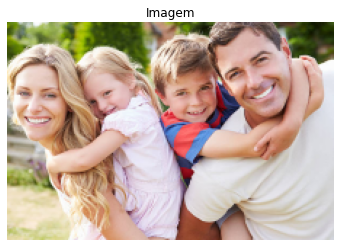

In [5]:
# Redimensionar e mostrar a imagem
redimensionado = cv.resize(imagem, dimensao, interpolation=cv.INTER_AREA)
mostrar_imagem(redimensionado)

***

In [6]:
# Precisamos ter em mente o "aspect ratio" para que a imagem não pareça distorcida.
# Portanto, calculamos a proporção da nova imagem para a imagem antiga.
# Vamos fazer a nossa nova imagem ter uma largura de 150 pixel
razao = 450.0 / largura
dimensao = (450, int(altura * razao))

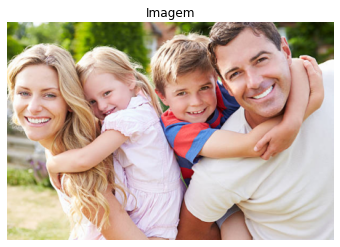

In [7]:
# Redimensionar e mostrar a imagem
redimensionado = cv.resize(imagem, dimensao, interpolation=cv.INTER_AREA)
mostrar_imagem(redimensionado)

***
### INTER_NEAREST
***

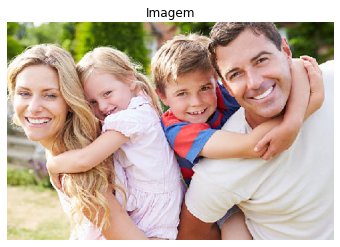

In [8]:
# Redimensionar e mostrar a imagem
redimensionado = cv.resize(imagem, dimensao, interpolation=cv.INTER_NEAREST)
mostrar_imagem(redimensionado)

***
### INTER_LINEAR
***

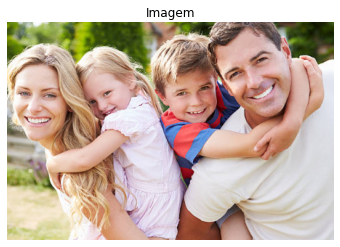

In [9]:
# Redimensionar e mostrar a imagem
redimensionado = cv.resize(imagem, dimensao, interpolation=cv.INTER_LINEAR)
mostrar_imagem(redimensionado)

***
### INTER_CUBIC
***

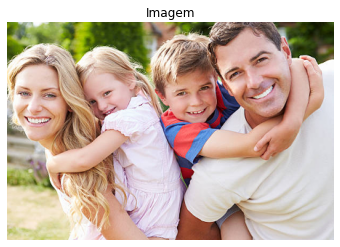

In [10]:
# Redimensionar e mostrar a imagem
redimensionado = cv.resize(imagem, dimensao, interpolation=cv.INTER_CUBIC)
mostrar_imagem(redimensionado)

***
### INTER_LANCZOS4
***

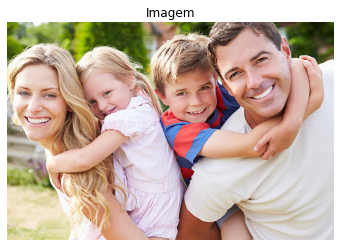

In [11]:
# Redimensionar e mostrar a imagem
redimensionado = cv.resize(imagem, dimensao, interpolation=cv.INTER_LANCZOS4)
mostrar_imagem(redimensionado)